In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### In this exercise, we will predict the gender of the student based on his score in different topics and some other features

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check The Data For The Null Values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# Edit The Feature Names To Replace The Space Character

In [10]:
df.columns = df.columns.str.replace(" ","_")

In [11]:
# Display The Ubiques Of Features

In [12]:
gender_unique = df["gender"].unique()
race_unique = df["race/ethnicity"].unique()
parent_education_unique = df["parental_level_of_education"].unique()
lunch_unique = df["lunch"].unique()
test_preparation_unique = df["test_preparation_course"].unique()

print(f"Gender Unique                      : {gender_unique}")
print(f"Race Unique                        : {race_unique}")
print(f"Parental Level Od Education Unique : {parent_education_unique}")
print(f"Lunch Unique                       : {lunch_unique}")
print(f"Test Preparation Course Unique     : {test_preparation_unique}")

Gender Unique                      : ['female' 'male']
Race Unique                        : ['group B' 'group C' 'group A' 'group D' 'group E']
Parental Level Od Education Unique : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch Unique                       : ['standard' 'free/reduced']
Test Preparation Course Unique     : ['none' 'completed']


In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


c:\Users\Alaswad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

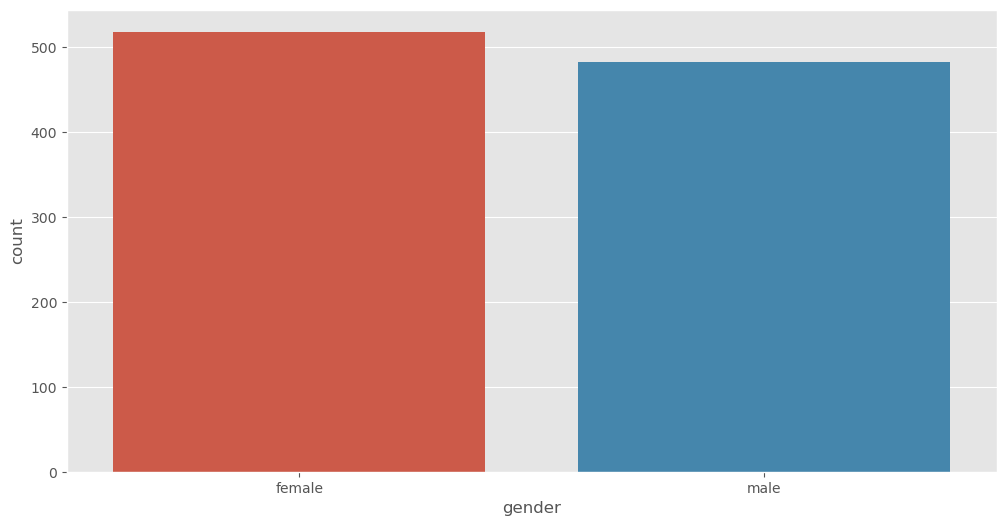

In [14]:
sns.countplot(df.gender)

In [15]:
# The study doesn't require oversampling or undersampling

In [16]:
df.gender.value_counts(normalize=True)*100 

female    51.8
male      48.2
Name: gender, dtype: float64

c:\Users\Alaswad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

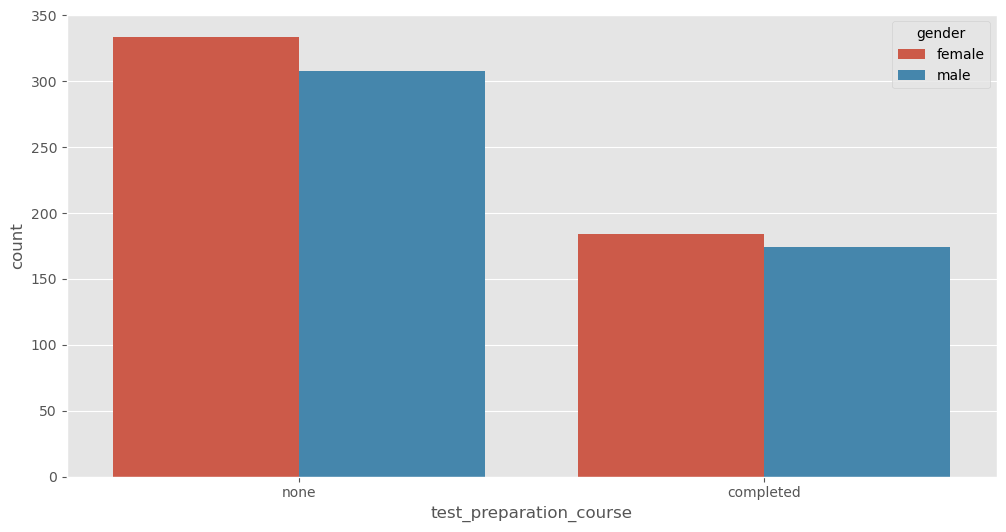

In [17]:
sns.countplot(df.test_preparation_course,hue=df.gender)

In [18]:
# almost of 30% from both genders did test preparation courses 

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

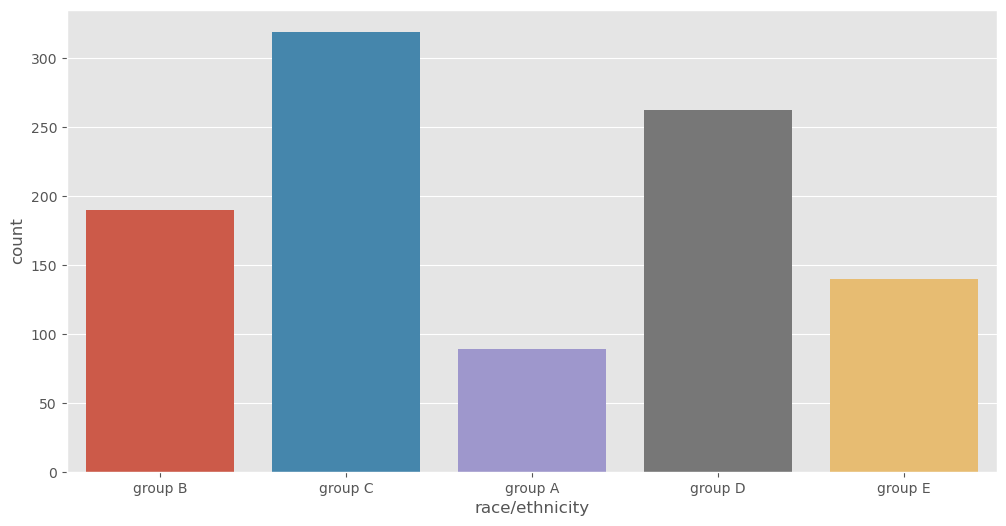

In [19]:
sns.countplot(x="race/ethnicity",data=df)

In [20]:
# Group C is the highiest group for race then group D.
# Let's explore how is Groups regarding the preparation courses

In [21]:
df.groupby("race/ethnicity")["test_preparation_course"].value_counts(normalize=True)*100

race/ethnicity  test_preparation_course
group A         none                       65.168539
                completed                  34.831461
group B         none                       64.210526
                completed                  35.789474
group C         none                       63.322884
                completed                  36.677116
group D         none                       68.702290
                completed                  31.297710
group E         none                       57.142857
                completed                  42.857143
Name: test_preparation_course, dtype: float64

In [22]:
df.groupby("race/ethnicity")["parental_level_of_education"].value_counts()

race/ethnicity  parental_level_of_education
group A         some high school               24
                high school                    18
                some college                   18
                associate's degree             14
                bachelor's degree              12
                master's degree                 3
group B         high school                    48
                associate's degree             41
                some high school               38
                some college                   37
                bachelor's degree              20
                master's degree                 6
group C         associate's degree             78
                some college                   69
                high school                    64
                some high school               49
                bachelor's degree              40
                master's degree                19
group D         some college                   67
      

<Figure size 4000x4000 with 0 Axes>

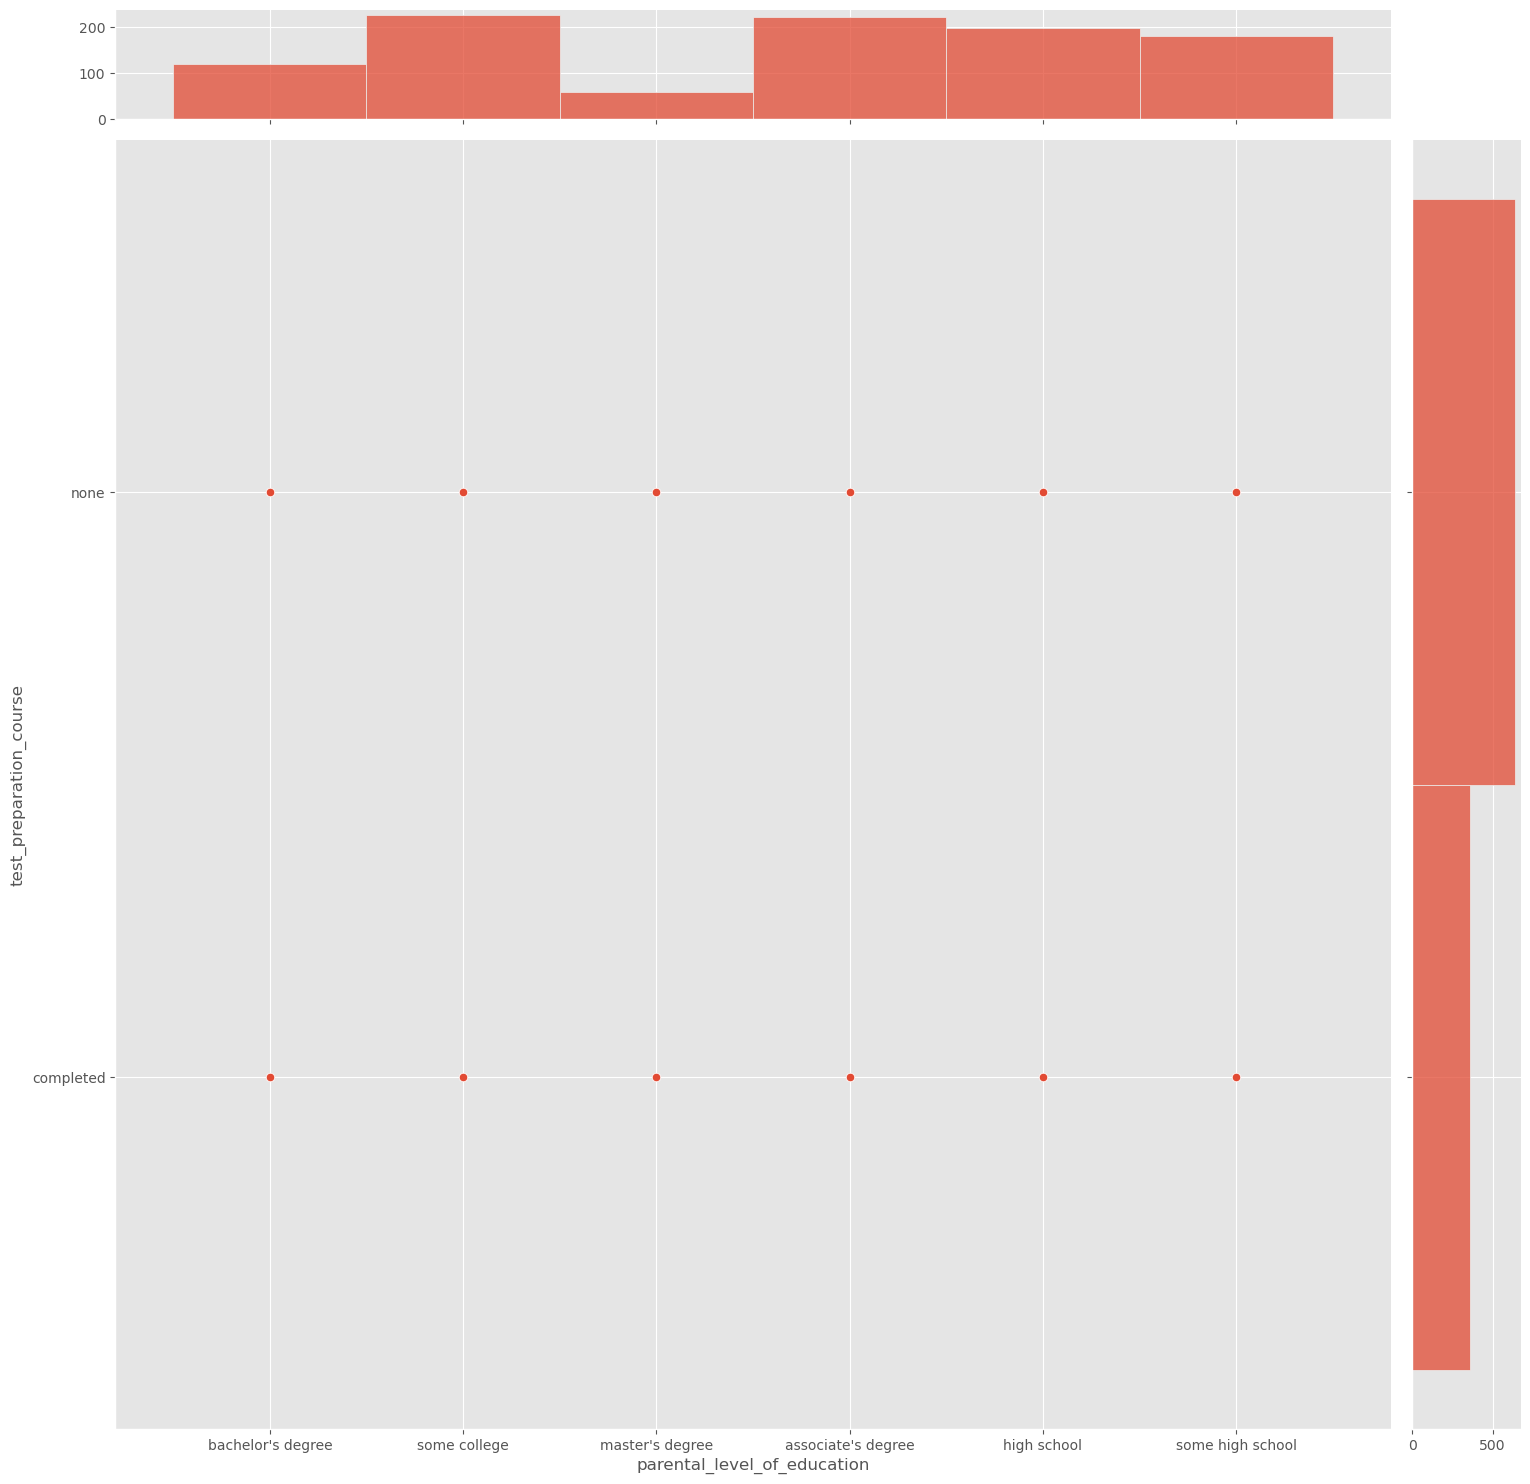

In [23]:
fig = plt.figure(figsize=(40,40))
sns.jointplot(x="parental_level_of_education",y="test_preparation_course",data=df,kind="scatter",marginal_ticks=True,ratio=10,height=15)

plt.show()

In [24]:
# group E members are the highiest member willing to take a preparation course then class C than other groups.
# Associate degree and some college are the parental level education for the members who mostly prepared for test.

In [25]:
# Doing some analysis with the student gender

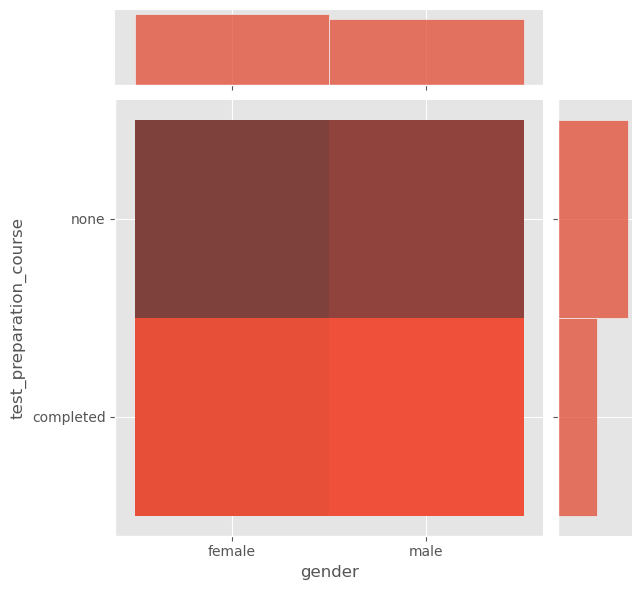

In [26]:
sns.jointplot(x=df.gender,y=df.test_preparation_course,kind="hist")

In [27]:
# Females are mostly prepare for the test more than men

In [28]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.gender[df.math_score].describe()

count     1000
unique       2
top       male
freq       568
Name: gender, dtype: object

In [30]:
def Mean( a , i , j):
    if a in df.columns:   
        male   = df[a][df["gender"]==i].mean()
        female = df[a][df["gender"]==j].mean()
        return male, female
    
    
mathe_score   = Mean(a="math_score",i="male",j="female")
reading_score = Mean(a="reading_score",i="male",j="female")
writing_score = Mean(a="writing_score",i="male",j="female")

print(f"Mean of math score for male      : {mathe_score[0]:.2f}")
print(f"Mean of math score for female    : {mathe_score[1]:.2f}")
print(f"Mean of reading score for male   : {reading_score[0]:.2f}")
print(f"Mean of reading score for female : {reading_score[1]:.2f}")
print(f"Mean of writing score for male   : {writing_score[0]:.2f}")
print(f"Mean of writing score for female : {writing_score[1]:.2f}")


Mean of math score for male      : 68.73
Mean of math score for female    : 63.63
Mean of reading score for male   : 65.47
Mean of reading score for female : 72.61
Mean of writing score for male   : 63.31
Mean of writing score for female : 72.47


In [31]:
# both male and female genders are almost having degrees in the same range for math and reading and writing

In [32]:
def Max( a , i , j):
    if a in df.columns:   
        male   = df[a][df["gender"]==i].max()
        female = df[a][df["gender"]==j].max()
        return male, female
    
    
mathe_score = Max(a="math_score",i="male",j="female")
reading_score = Max(a="reading_score",i="male",j="female")
writing_score = Max(a="writing_score",i="male",j="female")

print(f"Max of math score for male      : {mathe_score[0]:.2f}")
print(f"Max of math score for female    : {mathe_score[1]:.2f}")
print(f"Max of reading score for male   : {reading_score[0]:.2f}")
print(f"Max of reading score for female : {reading_score[1]:.2f}")
print(f"Mean of writing score for male  : {writing_score[0]:.2f}")
print(f"Max of writing score for female : {writing_score[1]:.2f}")


Max of math score for male      : 100.00
Max of math score for female    : 100.00
Max of reading score for male   : 100.00
Max of reading score for female : 100.00
Mean of writing score for male  : 100.00
Max of writing score for female : 100.00


In [33]:
def Min( a , i , j):
    if a in df.columns:   
        male   = df[a][df["gender"]==i].min()
        female = df[a][df["gender"]==j].min()
        return male, female
    
    
mathe_score = Min(a="math_score",i="male",j="female")
reading_score = Min(a="reading_score",i="male",j="female")
writing_score = Min(a="writing_score",i="male",j="female")

print(f"Min of math score for male      : {mathe_score[0]:.2f}")
print(f"Min of math score for female    : {mathe_score[1]:.2f}")
print(f"Min of reading score for male   : {reading_score[0]:.2f}")
print(f"Min of reading score for female : {reading_score[1]:.2f}")
print(f"Min of writing score for male   : {writing_score[0]:.2f}")
print(f"Min of writing score for female : {writing_score[1]:.2f}")

Min of math score for male      : 27.00
Min of math score for female    : 0.00
Min of reading score for male   : 23.00
Min of reading score for female : 17.00
Min of writing score for male   : 15.00
Min of writing score for female : 10.00


In [34]:
# from the above three analysis it is clear that male is better than the females in math and reading and writing tests

In [35]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [36]:
math_parent_edu    = df.parental_level_of_education[df.math_score.max()]
reading_parent_edu = df.parental_level_of_education[df.reading_score.max()]
writing_parent_edu = df.parental_level_of_education[df.writing_score.max()]
print(math_parent_edu)
print(reading_parent_edu)
print(writing_parent_edu)


some college
some college
some college


In [37]:
# Some college as a parent education is might affect on the study of their kids

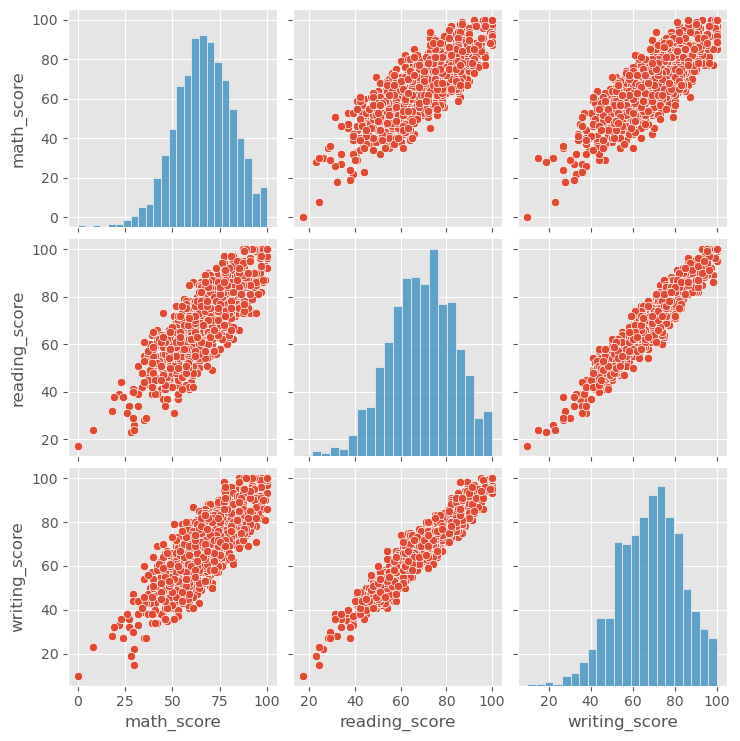

In [38]:
sns.pairplot(df)

In [39]:
# almost all studing topics has a good positive covariance

<AxesSubplot:>

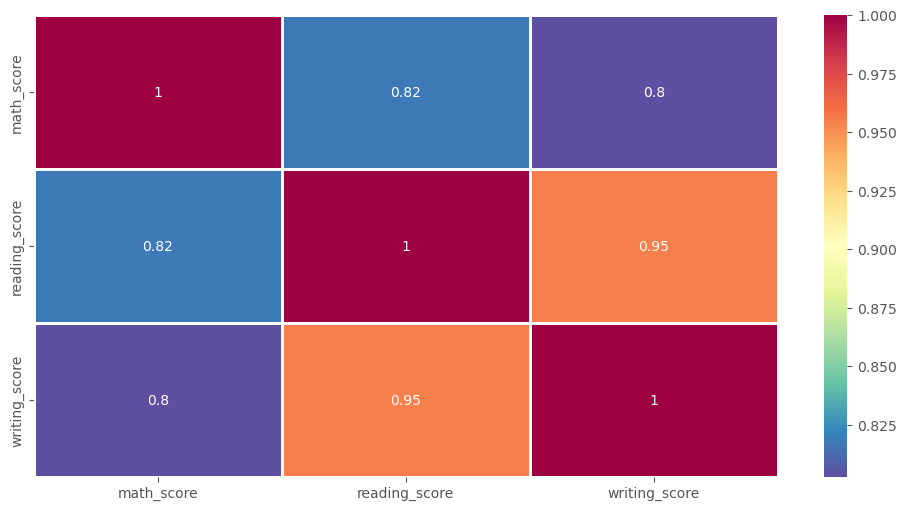

In [40]:
sns.heatmap(df.corr(),annot=True,cmap="Spectral_r",linewidths=2)

In [41]:
# reading and writing skills has a good correlation 
# math and writing skills has a less correlation

In [42]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [43]:
# math is the most difficult topic

In [44]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [45]:
from sklearn.preprocessing import LabelBinarizer ,label_binarize , MultiLabelBinarizer
LB  = LabelBinarizer()
df.gender = LB.fit_transform(df.gender)


In [46]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


In [47]:
df.drop( ["lunch","race/ethnicity"] , axis=1,inplace=True)

In [48]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,0,bachelor's degree,none,72,72,74
1,0,some college,completed,69,90,88
2,0,master's degree,none,90,95,93
3,1,associate's degree,none,47,57,44
4,1,some college,none,76,78,75


In [49]:
df.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

In [50]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,0,bachelor's degree,none,72,72,74
1,0,some college,completed,69,90,88
2,0,master's degree,none,90,95,93
3,1,associate's degree,none,47,57,44
4,1,some college,none,76,78,75


In [51]:
df.test_preparation_course     = LB.fit_transform(df.test_preparation_course)
df.parental_level_of_education = LB.fit_transform(df.parental_level_of_education)

In [52]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,0,0,1,72,72,74
1,0,0,0,69,90,88
2,0,0,1,90,95,93
3,1,1,1,47,57,44
4,1,0,1,76,78,75


In [53]:
X = df.iloc[ : ,1:-1].values
y = df.iloc[ : ,0].values

In [54]:
X

array([[ 0,  1, 72, 72],
       [ 0,  0, 69, 90],
       [ 0,  1, 90, 95],
       ...,
       [ 0,  0, 59, 71],
       [ 0,  0, 68, 78],
       [ 0,  1, 77, 86]], dtype=int64)

In [55]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Xtrain , Xtest , ytrain , ytest = train_test_split( X , y , test_size=0.2, random_state=20)

In [58]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# Xtrain = sc.fit_transform(Xtrain)
# #ytrain = sc.fit_transform(ytrain)
# Xtest = sc.transform(Xtest)
# #ytest = sc.transform(ytest)

In [59]:
Xtrain

array([[ 0,  1, 40, 59],
       [ 1,  1, 66, 77],
       [ 0,  1, 59, 62],
       ...,
       [ 0,  1, 58, 49],
       [ 1,  0, 90, 90],
       [ 0,  1, 61, 72]], dtype=int64)

# Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error , r2_score , accuracy_score , recall_score
from mlxtend.evaluate import bias_variance_decomp

lr = LinearRegression()
lr.fit(Xtrain,ytrain)
ypred_lr = lr.predict(Xtest)

Coef = lr.coef_
Intercept = lr.intercept_
print(f"Coef of Linear Regression       : {Coef}")
print(f"Intercept of Linear Regression  : {Intercept}")

mselr = mean_squared_error(ytest,ypred_lr)
maelr = mean_absolute_error(ytest,ypred_lr)
mapelr = mean_absolute_percentage_error(ytest,ypred_lr)
rmselr = np.sqrt(mselr)
#acclr = accuracy_score(ytest,ypred_lr)
r2lr = r2_score(ytest,ypred_lr)
#recalllr = recall_score(ytest,ypred_lr)

ave_losslr , ave_biaslr , ave_varlr = bias_variance_decomp(lr , Xtrain , ytrain , Xtest , ytest , loss = "mse" ,num_rounds=100, random_seed=123)

print(f"MSE of Linear Regression Model              : {mselr:.2f}")
print(f"MAE of Linear Regression Model              : {maelr:.2f}")
print(f"MAPE of Linear Regression Model             : {mapelr:.2f}%")
print(f"RMSE of Linear Regression Model             : {rmselr:.2f}")
print(f"RMSE of Linear Regression Model             : {rmselr:.2f}")
#print(f"Accuracy of Linear Regression Model          : {acclr:.2f}")
print(f"r2score of Linear Regression Model          : {r2lr*100:.2f}%")
#print(f"Recall  of Linear Regression Model     : {recalllr:.2f}")
print(f"Recall Loss of Linear Regression Model      : {ave_losslr:.2f}")
print(f"Average Bias of Linear Regression Model     : {ave_biaslr:.2f}")
print(f"Average Variance of Linear Regression Model : {ave_varlr:.2f}")


Coef of Linear Regression       : [ 0.00026054 -0.09886787  0.03722589 -0.04067121]
Intercept of Linear Regression  : 0.8972166957166484
MSE of Linear Regression Model              : 0.13
MAE of Linear Regression Model              : 0.30
MAPE of Linear Regression Model             : 644581703765517.75%
RMSE of Linear Regression Model             : 0.37
RMSE of Linear Regression Model             : 0.37
r2score of Linear Regression Model          : 46.56%
Recall Loss of Linear Regression Model      : 0.13
Average Bias of Linear Regression Model     : 0.13
Average Variance of Linear Regression Model : 0.00


# Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

modelPoly = PolynomialFeatures(degree=5)
Polytrain = modelPoly.fit_transform(Xtrain)
Polytest = modelPoly.fit_transform(Xtest)
ModelLin = LinearRegression()
modelPF=ModelLin.fit(Polytrain,ytrain)

ypredPF = modelPF.predict(Polytest)

CoefPF = modelPF.coef_
InterceptPF = modelPF.intercept_
print(f"Coef of Polynomial Regression       : {CoefPF}")
print(f"Intercept of Polynomial Regression  : {InterceptPF}")

msePF = mean_squared_error(ytest,ypredPF)
maePF = mean_absolute_error(ytest,ypredPF)
mapePF = mean_absolute_percentage_error(ytest,ypredPF)
rmsePF = np.sqrt(msePF)
scorePF = r2_score(ytest,ypredPF)
#ave_lossPF , ave_biasPF , ave_varPF = bias_variance_decomp(modelPF , Polytrain,ytrain,Polytest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) # taking long time for excecution

print(f"MSE of Polynomial Regression   : {msePF:.2f}")
print(f"MAE of Polynomial Regression   : {maePF:.2f}")
print(f"MAPE of Polynomial Regression  : {mapePF:.2f}")
print(f"RMSE of Polynomial Regression  : {rmsePF:.2f}")
print(f"SCORE of Polynomial Regression : {scorePF*100:.2f} %")
#print(f"Loss of Polynomial Regression : {ave_lossPF:.2f} ")
#print(f"BIAS of Polynomial Regression : {ave_biasPF:.2f} ")
#print(f"VARIANCE of Polynomial Regression : {ave_varPF:.2f} ")

Coef of Polynomial Regression       : [ 3.44078144e-05 -1.21592150e+00 -2.38372673e+00 -2.90828405e-01
 -4.29338786e-01 -1.21591569e+00  5.49677021e-01 -7.90492447e-02
  1.40265046e-01 -2.38372209e+00  5.27962858e-02  1.25466647e-01
  1.03232483e-03  2.44496655e-02 -6.40642409e-03 -1.21591588e+00
  5.49676707e-01 -7.90498170e-02  1.40265942e-01  5.49677008e-01
  4.49098969e-02 -8.64906610e-02  1.45563381e-03  1.06507984e-03
 -3.29438414e-03 -2.38372273e+00  5.27956678e-02  1.25466521e-01
 -2.01005600e-04 -3.07375401e-03 -2.02263799e-03 -4.57229566e-04
  9.32759072e-04 -1.24421268e-03  5.06224655e-04 -1.21591569e+00
  5.49677010e-01 -7.90498157e-02  1.40265942e-01  5.49677010e-01
  4.49098975e-02 -8.64906619e-02  1.45563439e-03  1.06508050e-03
 -3.29438477e-03  5.49677010e-01  4.49098975e-02 -8.64906619e-02
  1.42949485e-04 -2.92727893e-03  3.94002000e-03 -2.73547964e-05
  5.58273257e-06 -2.10529869e-06  1.98457364e-05 -2.38372273e+00
  5.27956675e-02  1.25466521e-01 -2.01005643e-04 -3.

# Decission Tree Regression

|--- reading_score <= 57.50
|   |--- math_score <= 44.50
|   |   |--- math_score <= 38.50
|   |   |   |--- reading_score <= 30.00
|   |   |   |   |--- value: [0.60]
|   |   |   |--- reading_score >  30.00
|   |   |   |   |--- value: [0.09]
|   |   |--- math_score >  38.50
|   |   |   |--- reading_score <= 43.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- reading_score >  43.50
|   |   |   |   |--- value: [0.32]
|   |--- math_score >  44.50
|   |   |--- math_score <= 52.50
|   |   |   |--- reading_score <= 52.50
|   |   |   |   |--- value: [0.93]
|   |   |   |--- reading_score >  52.50
|   |   |   |   |--- value: [0.36]
|   |   |--- math_score >  52.50
|   |   |   |--- math_score <= 56.50
|   |   |   |   |--- value: [0.86]
|   |   |   |--- math_score >  56.50
|   |   |   |   |--- value: [0.98]
|--- reading_score >  57.50
|   |--- math_score <= 65.50
|   |   |--- math_score <= 59.50
|   |   |   |--- reading_score <= 62.50
|   |   |   |   |--- value: [0.19]
|   |   |   |--- readin

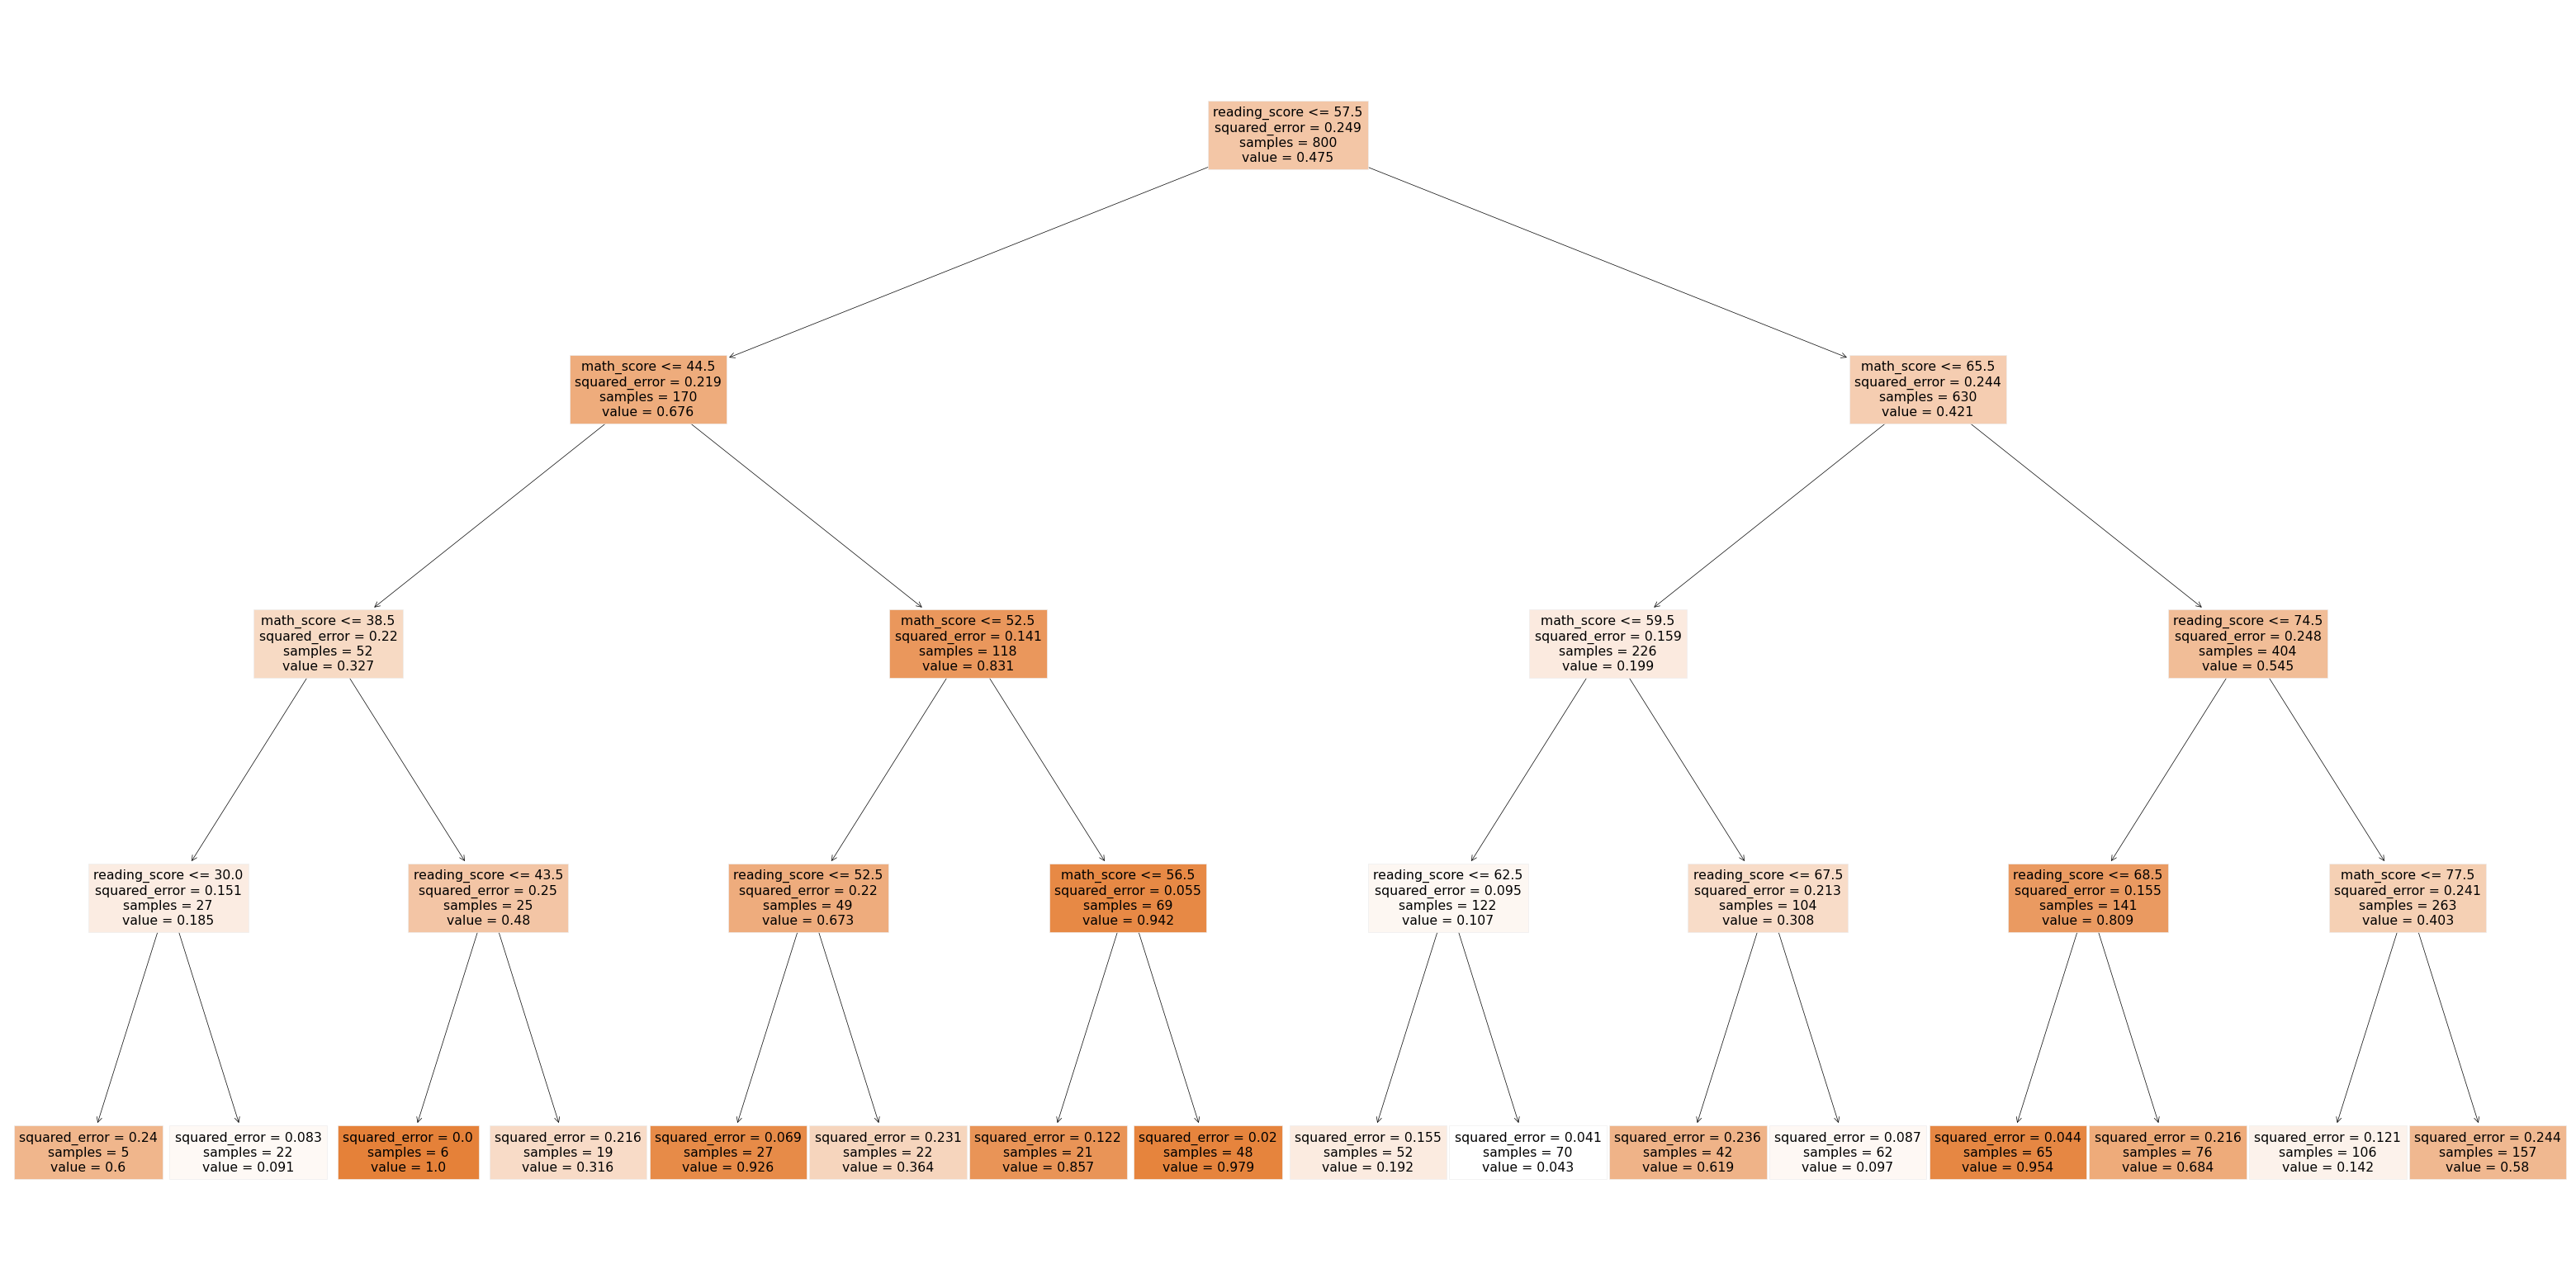

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text , plot_tree


modelDTR = DecisionTreeRegressor(max_depth=4,random_state=0)
modelDTR.fit(Xtrain , ytrain)
ypredDTR = modelDTR.predict(Xtest)

fig= plt.figure(figsize=(40,20))
feature = list(df.iloc[0, 1:-1].index)
#features= df.columns.to_list()

textDTR = export_text(modelDTR,feature_names=feature)
plotDTR = plot_tree(modelDTR,feature_names=feature,filled=True)

print(textDTR)
print(plotDTR)



In [63]:
#CoefDTR = modelDTR.coef_
#InterceptDTR = modelDTR.intercept_
#print(f"Coef of Polynomial Regression  : {CoefDTR}")
#print(f"Intercept of Polynomial Regression  : {InterceptDTR}")


mseDTR = mean_squared_error(ytest,ypredDTR)
maeDTR = mean_absolute_error(ytest,ypredDTR)
mapeDTR = mean_absolute_percentage_error(ytest,ypredDTR)
rmseDTR = np.sqrt(mseDTR)
scoreDTR = r2_score(ytest,ypredDTR)
#accuracyDTR=accuracy_score(ytest,ypredDTR)
#recallDTR = recall_score(ytest,ypredDTR)
ave_lossDTR , ave_biasDTR , ave_varDTR = bias_variance_decomp(modelDTR , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Decission Tree Regression      : {mseDTR:.2f}")
print(f"MAE of Decission Tree Regression      : {maeDTR:.2f}")
print(f"MAPE of Decission Tree Regression     : {mapeDTR:.2f}")
print(f"RMSE of Decission Tree Regression     : {rmseDTR:.2f}")
print(f"SCORE of Decission Tree Regression    : {scoreDTR*100:.2f} %")
#print(f"Accuracy of Decission Tree Regression : {accuracyDTR*100:.2f} %")
#print(f"RECALL of Decission Tree Regression   : {recallDTR*100:.2f} %")
print(f"Loss of Decission Tree Regression     : {ave_lossDTR:.2f} ")
print(f"BIAS of Decission Tree Regression     : {ave_biasDTR:.2f} ")
print(f"VARIANCE of Decission Tree Regression : {ave_varDTR:.2f} ")

MSE of Decission Tree Regression      : 0.17
MAE of Decission Tree Regression      : 0.31
MAPE of Decission Tree Regression     : 704763120585021.00
RMSE of Decission Tree Regression     : 0.41
SCORE of Decission Tree Regression    : 31.90 %
Loss of Decission Tree Regression     : 0.19 
BIAS of Decission Tree Regression     : 0.15 
VARIANCE of Decission Tree Regression : 0.04 


# Decission Tree Classification

|--- reading_score <= 57.50
|   |--- math_score <= 44.50
|   |   |--- math_score <= 38.50
|   |   |   |--- reading_score <= 30.00
|   |   |   |   |--- class: 1
|   |   |   |--- reading_score >  30.00
|   |   |   |   |--- class: 0
|   |   |--- math_score >  38.50
|   |   |   |--- reading_score <= 43.50
|   |   |   |   |--- class: 1
|   |   |   |--- reading_score >  43.50
|   |   |   |   |--- class: 0
|   |--- math_score >  44.50
|   |   |--- math_score <= 52.50
|   |   |   |--- reading_score <= 52.50
|   |   |   |   |--- class: 1
|   |   |   |--- reading_score >  52.50
|   |   |   |   |--- class: 0
|   |   |--- math_score >  52.50
|   |   |   |--- math_score <= 56.50
|   |   |   |   |--- class: 1
|   |   |   |--- math_score >  56.50
|   |   |   |   |--- class: 1
|--- reading_score >  57.50
|   |--- math_score <= 65.50
|   |   |--- math_score <= 59.50
|   |   |   |--- reading_score <= 62.50
|   |   |   |   |--- class: 0
|   |   |   |--- reading_score >  62.50
|   |   |   |   |--- class: 

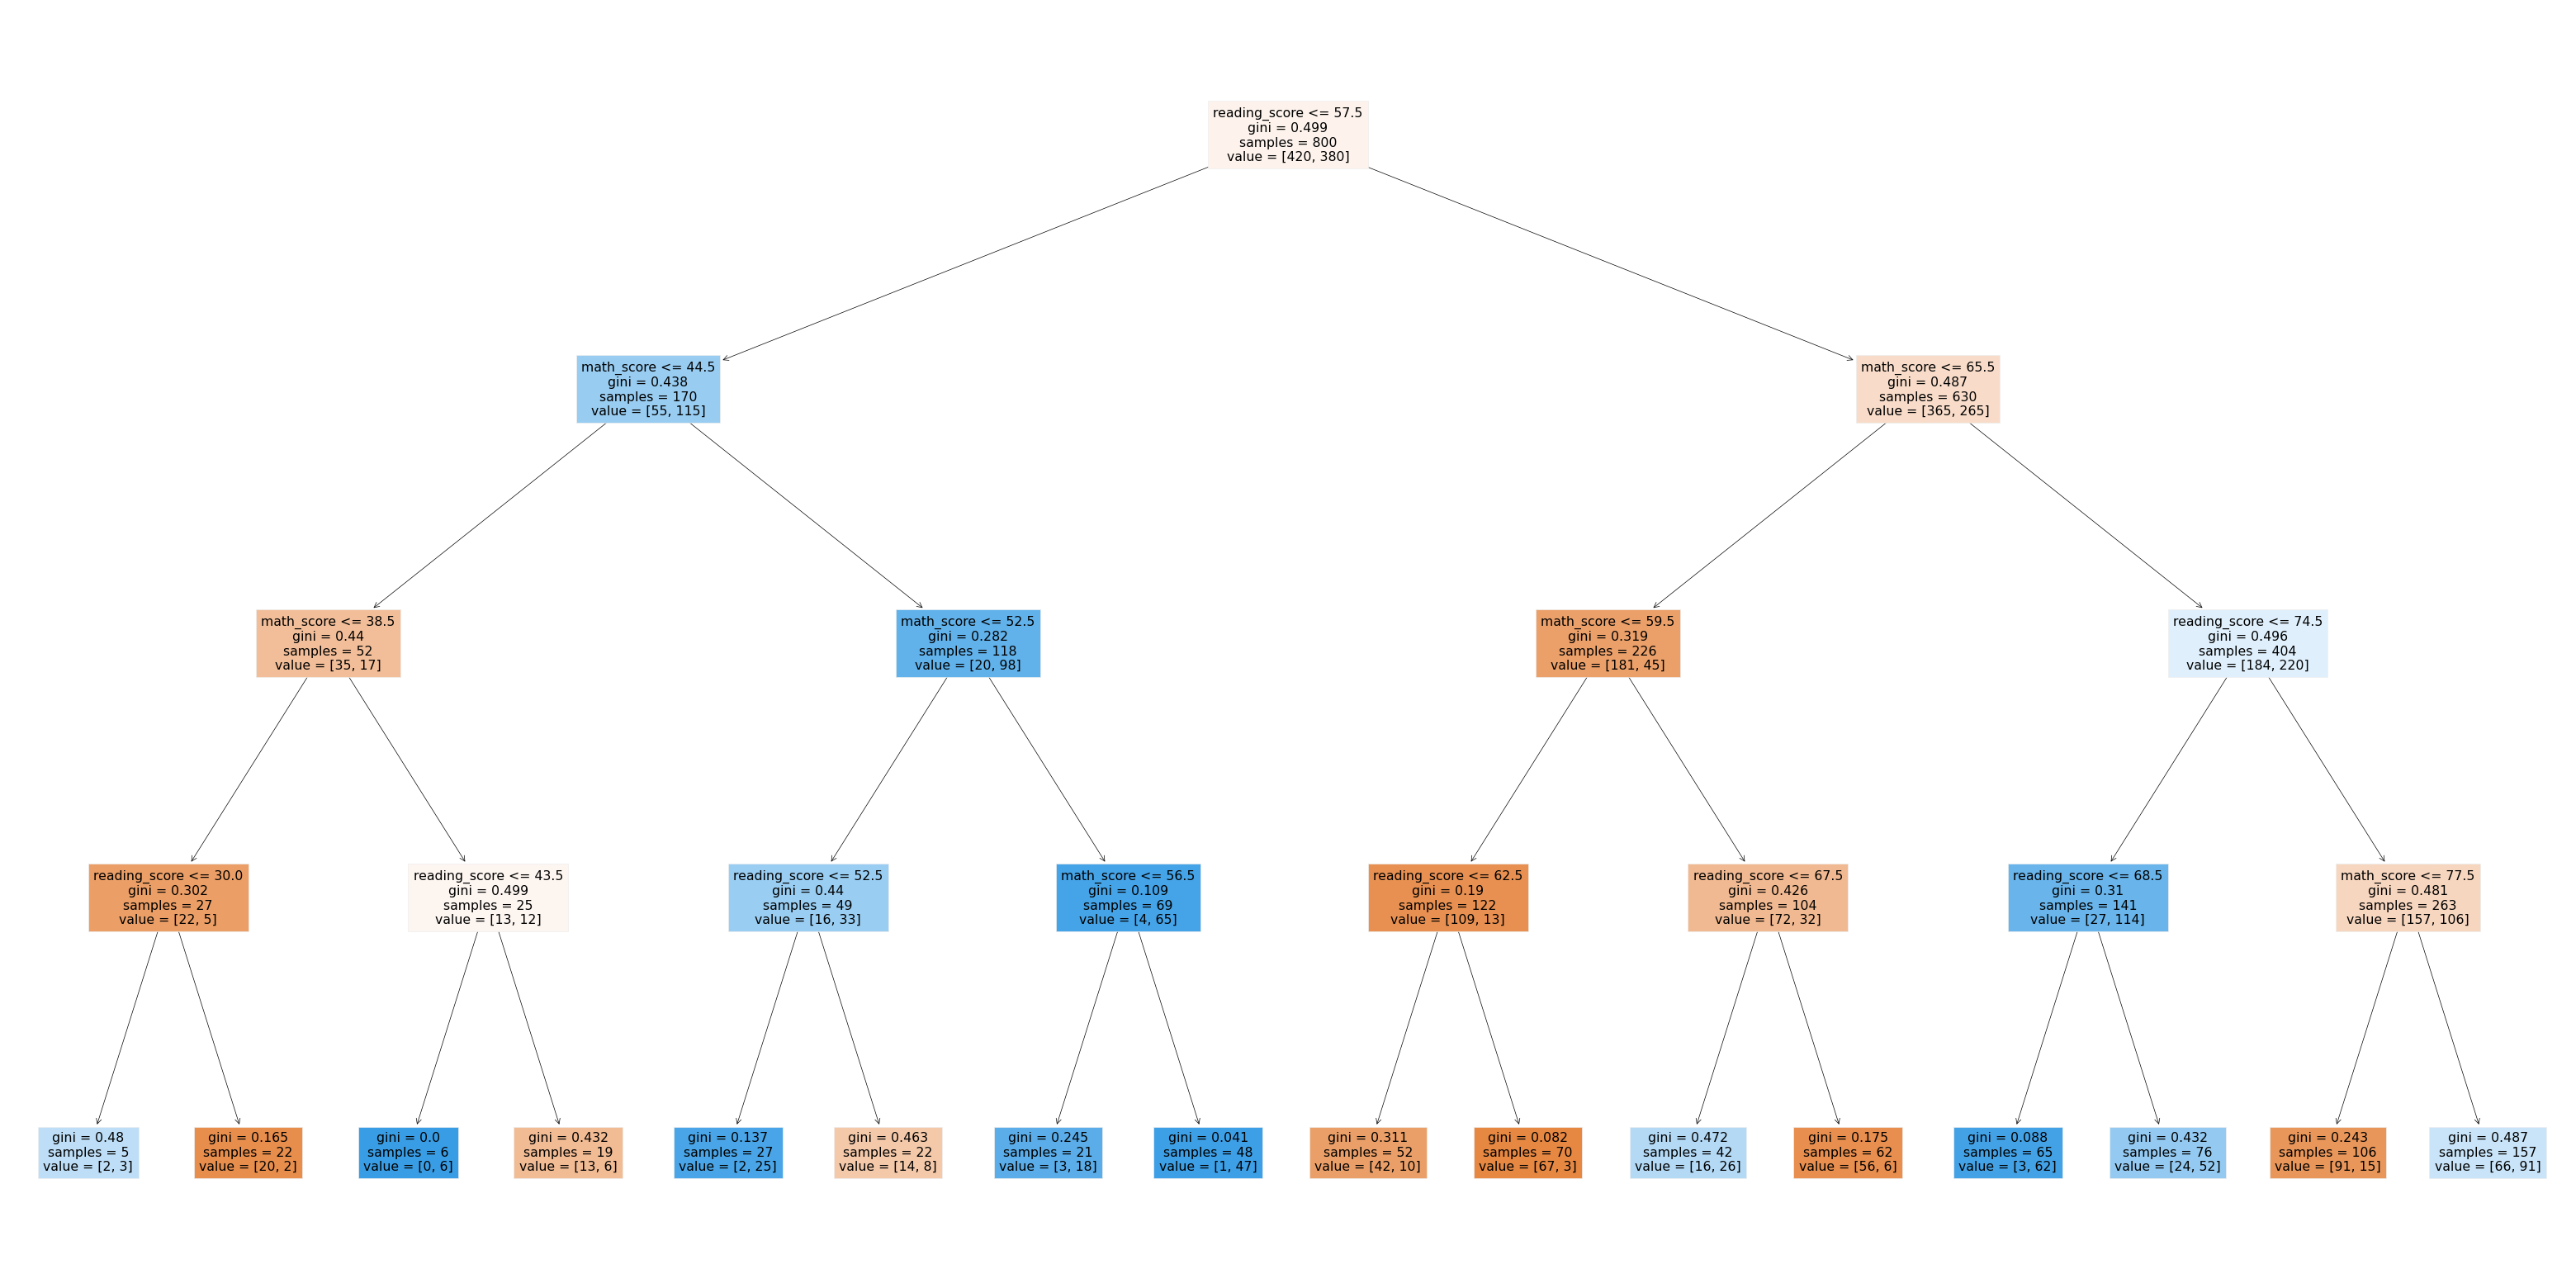

In [64]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(max_depth=4,random_state=0)
modelDTC.fit(Xtrain,ytrain)
ypredDTC = modelDTC.predict(Xtest)

fig = plt.figure(figsize=(40,20))
textDTC = export_text(modelDTC,feature_names=feature)
plotDTC = plot_tree(modelDTC,feature_names=feature,filled=True)
print(textDTC)
print(plotDTC)



In [65]:
#CoefDTC = modelDTC.coef_
#InterceptDTC = modelDTC.intercept_
#print(f"Coef of Polynomial Regression  : {CoefDTC}")
#print(f"Intercept of Polynomial Regression  : {InterceptDTC}")


mseDTC = mean_squared_error(ytest,ypredDTC)
maeDTC = mean_absolute_error(ytest,ypredDTC)
mapeDTC = mean_absolute_percentage_error(ytest,ypredDTC)
rmseDTC = np.sqrt(mseDTC)
scoreDTC = r2_score(ytest,ypredDTC)
accuracyDTC = accuracy_score(ytest,ypredDTC)
recallDTC = recall_score(ytest,ypredDTC)
ave_lossDTC , ave_biasDTC , ave_varDTC = bias_variance_decomp(modelDTC , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Decission Tree Classifier      : {mseDTC:.2f}")
print(f"MAE of Decission Tree Classifier      : {maeDTC:.2f}")
print(f"MAPE of Decission Tree Classifier     : {mapeDTC:.2f}")
print(f"RMSE of Decission Tree Classifier     : {rmseDTC:.2f}")
print(f"SCORE of Decission Tree Classifier    : {scoreDTC*100:.2f} %")
print(f"Accuracy of Decission Tree Classifier : {accuracyDTC*100:.2f} %")
print(f"Recall of Decission Tree Classifier   : {recallDTC*100:.2f} %")
print(f"Loss of Decission Tree Classifier     : {ave_lossDTC:.2f} ")
print(f"BIAS of Decission Tree Classifier     : {ave_biasDTC:.2f} ")
print(f"VARIANCE of Decission Tree Classifier : {ave_varDTC:.2f} ")

MSE of Decission Tree Classifier      : 0.26
MAE of Decission Tree Classifier      : 0.26
MAPE of Decission Tree Classifier     : 833165931063541.75
RMSE of Decission Tree Classifier     : 0.50
SCORE of Decission Tree Classifier    : -2.04 %
Accuracy of Decission Tree Classifier : 74.50 %
Recall of Decission Tree Classifier   : 86.27 %
Loss of Decission Tree Classifier     : 0.28 
BIAS of Decission Tree Classifier     : 0.16 
VARIANCE of Decission Tree Classifier : 0.12 


# Random Forrest Regression

In [66]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(n_estimators=20,random_state=42)
modelRFR.fit(Xtrain,ytrain)
ypredRFR = modelRFR.predict(Xtest)

#textRFR = export_text(modelRFR,feature_names=feature)
#plotRFR = plot_tree(modelRFR,feature_names=feature,filled=True)

#CoefRFR = modelRFR.coef_
#InterceptRFR = modelRFR.intercept_
#print(f"Coef of Polynomial Regression  : {CoefRFR}")
#print(f"Intercept of Polynomial Regression  : {InterceptRFR}")


mseRFR = mean_squared_error(ytest,ypredRFR)
maeRFR = mean_absolute_error(ytest,ypredRFR)
mapeRFR = mean_absolute_percentage_error(ytest,ypredRFR)
rmseRFR = np.sqrt(mseRFR)
scoreRFR = r2_score(ytest,ypredRFR)
#recallRFC = recall_score(ytest,ypredRFR)
#accuracyRFR = accuracy_score(ytest,ypredRFR)
ave_lossRFR , ave_biasRFR , ave_varRFR = bias_variance_decomp(modelRFR , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Random Forrest Regressor      : {mseRFR:.2f}")
print(f"MAE of Random Forrest Regressor      : {maeRFR:.2f}")
print(f"MAPE of Random Forrest Regressor     : {mapeRFR:.2f}")
print(f"RMSE of Random Forrest Regressor     : {rmseRFR:.2f}")
print(f"SCORE of Random Forrest Regressor    : {scoreRFR*100:.2f} %")
#print(f"Accuracy of Random Forrest Regressor : {accuracyRFR*100:.2f} %")
print(f"Loss of Random Forrest Regressor     : {ave_lossRFR:.2f} ")
print(f"BIAS of Random Forrest Regressor     : {ave_biasRFR:.2f} ")
print(f"VARIANCE of Random Forrest Regressor : {ave_varRFR:.2f} ")

MSE of Random Forrest Regressor      : 0.15
MAE of Random Forrest Regressor      : 0.24
MAPE of Random Forrest Regressor     : 548980752434271.81
RMSE of Random Forrest Regressor     : 0.38
SCORE of Random Forrest Regressor    : 41.54 %
Loss of Random Forrest Regressor     : 0.16 
BIAS of Random Forrest Regressor     : 0.14 
VARIANCE of Random Forrest Regressor : 0.03 


# Random Forrest Classification

In [67]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestRegressor(n_estimators=100,random_state=42)
modelRFC.fit(Xtrain,ytrain)
ypredRFC = modelRFC.predict(Xtest)

#textRFC = export_text(modelRFC,feature_names=feature)                   # Not Applicable
#plotRFC = plot_tree(modelRFC,feature_names=feature,filled=True)

#CoefRFC = modelRFC.coef_
#InterceptRFC = modelRFC.intercept_
#print(f"Coef of Random Forrest Classifier  : {CoefRFC}")
#print(f"Intercept of Random Forrest Classifier  : {InterceptRFC}")


mseRFC = mean_squared_error(ytest,ypredRFC)
maeRFC = mean_absolute_error(ytest,ypredRFC)
mapeRFC = mean_absolute_percentage_error(ytest,ypredRFC)
rmseRFC = np.sqrt(mseRFC)
r2_scoreRFC = r2_score(ytest,ypredRFC)
#accuracyRFC = accuracy_score(ypredRFC,ytest)
scoreRFC = modelRFC.score(Xtest,ytest)
#recallRFC = recall_score(ytest, ypredRFC)
ave_lossRFC , ave_biasRFC , ave_varRFC = bias_variance_decomp(modelRFC , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Random Forrest Classifier      : {mseRFC:.2f}")
print(f"MAE of Random Forrest Classifier      : {maeRFC:.2f}")
print(f"MAPE of Random Forrest Classifier     : {mapeRFC:.2f}")
print(f"RMSE of Random Forrest Classifier     : {rmseRFC:.2f}")
print(f"r2 _SCORE of Random Forrest Classifier: {r2_scoreRFC*100:.2f} %")
#print(f"Accuracy of Random Forrest Classifier : {accuracyRFC*100:.2f} %")
print(f"SCORE of Random Forrest Classifier    : {scoreRFC*100:.2f} %")
print(f"Loss of Random Forrest Classifier     : {ave_lossRFC:.2f} ")
print(f"BIAS of Random Forrest Classifier     : {ave_biasRFC:.2f} ")
print(f"VARIANCE of Random Forrest Classifier : {ave_varRFC:.2f} ")

MSE of Random Forrest Classifier      : 0.14
MAE of Random Forrest Classifier      : 0.24
MAPE of Random Forrest Classifier     : 543265859972059.19
RMSE of Random Forrest Classifier     : 0.38
r2 _SCORE of Random Forrest Classifier: 42.30 %
SCORE of Random Forrest Classifier    : 42.30 %
Loss of Random Forrest Classifier     : 0.16 
BIAS of Random Forrest Classifier     : 0.14 
VARIANCE of Random Forrest Classifier : 0.02 


# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

modelLOR = LogisticRegression(random_state=42)
modelLOR.fit(Xtrain,ytrain)
ypredLOR = modelLOR.predict(Xtest)

mseLOR = mean_squared_error(ytest,ypredLOR)
maeLOR = mean_absolute_error(ytest,ypredLOR)
mapeLOR = mean_absolute_percentage_error(ytest,ypredLOR)
rmseLOR = np.sqrt(mseLOR)
scoreLOR = r2_score(ytest,ypredLOR)
accuracyLOR = accuracy_score(ytest,ypredLOR)
recallLOR = recall_score(ytest,ypredLOR)
ave_lossLOR , ave_biasLOR , ave_varLOR = bias_variance_decomp(modelLOR , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Logistic Regression      : {mseLOR:.2f}")
print(f"MAE of Logistic Regression      : {maeLOR:.2f}")
print(f"MAPE of Logistic Regression     : {mapeLOR:.2f}")
print(f"RMSE of Logistic Regression     : {rmseLOR:.2f}")
print(f"SCORE of Logistic Regression    : {scoreLOR*100:.2f} %")
print(f"ACCURACY of Logistic Regression : {accuracyLOR*100:.2f} %")
print(f"Recall of Logistic Regression   : {recallLOR*100:.2f} %")
print(f"Loss of Logistic Regression     : {ave_lossLOR:.2f} ")
print(f"BIAS of Logistic Regression     : {ave_biasLOR:.2f} ")
print(f"VARIANCE of Logistic Regression : {ave_varLOR:.2f} ")

MSE of Logistic Regression      : 0.20
MAE of Logistic Regression      : 0.20
MAPE of Logistic Regression     : 472877960873902.06
RMSE of Logistic Regression     : 0.45
SCORE of Logistic Regression    : 17.97 %
ACCURACY of Logistic Regression : 79.50 %
Recall of Logistic Regression   : 80.39 %
Loss of Logistic Regression     : 0.20 
BIAS of Logistic Regression     : 0.20 
VARIANCE of Logistic Regression : 0.01 


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

confusion_matrixLOR = confusion_matrix(ytest,ypredLOR)
accuracy = accuracy_score(ytest,ypredLOR)
reportLOR = classification_report(ytest,ypredLOR)
print(confusion_matrixLOR )
print(f"Accuracy Of Logistic Regreesion : {accuracy*100:.2f} %" )
print(reportLOR)

[[77 21]
 [20 82]]
Accuracy Of Logistic Regreesion : 79.50 %
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        98
           1       0.80      0.80      0.80       102

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.80      0.79       200



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


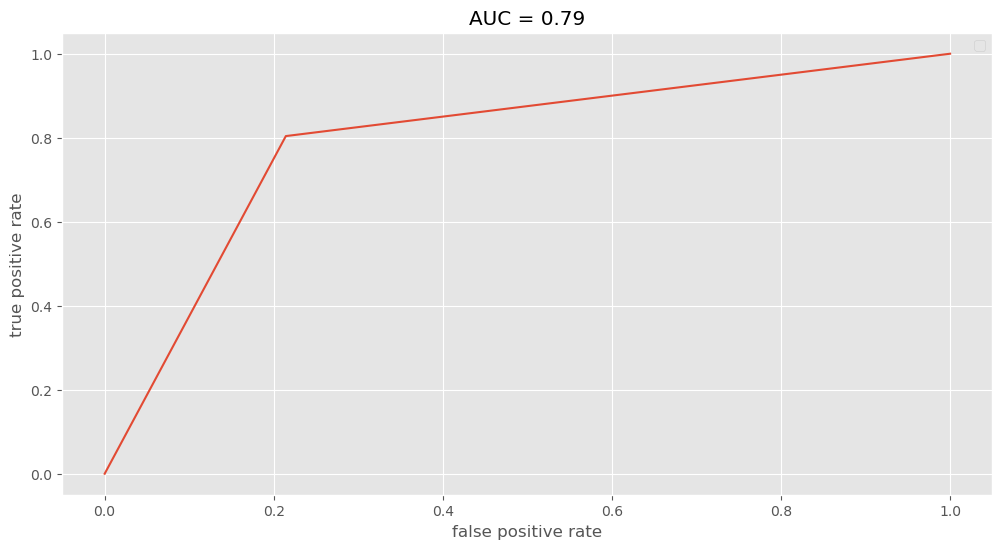

In [77]:
y_predLOR = modelLOR.predict_proba(Xtest)[:,1]

from sklearn.metrics import roc_curve , auc
fpr , tpr , threshold = roc_curve(ytest , ypredLOR)


roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.title(f"AUC = {roc_auc:.2f}")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.legend(loc="best")

plt.show()

# KNN Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(Xtrain,ytrain)
ypredKNN= modelKNN.predict(Xtest)

c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
mseKNN = mean_squared_error(ytest,ypredKNN)
maeKNN = mean_absolute_error(ytest,ypredKNN)
mapeKNN = mean_absolute_percentage_error(ytest,ypredKNN)
rmseKNN = np.sqrt(mseKNN)
scoreKNN = r2_score(ytest,ypredKNN)
accuracyKNN=accuracy_score(ytest,ypredKNN)
recallKNN = recall_score(ytest,ypredKNN)
ave_lossKNN , ave_biasKNN , ave_varKNN = bias_variance_decomp(modelKNN , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of KNN Classifier      : {mseKNN:.2f}")
print(f"MAE of KNN Classifier      : {maeKNN:.2f}")
print(f"MAPE of KNN Classifier     : {mapeKNN:.2f}")
print(f"RMSE of KNN Classifier     : {rmseKNN:.2f}")
print(f"SCORE of KNN Classifier    : {scoreKNN*100:.2f} %")
print(f"Accuracy of KNN Classifier : {accuracyKNN*100:.2f} %")
print(f"Recall of KNN Classifier   : {recallKNN*100:.2f} %")
print(f"Loss of KNN Classifier     : {ave_lossKNN:.2f} ")
print(f"BIAS of KNN Classifier     : {ave_biasKNN:.2f} ")
print(f"VARIANCE of KNN Classifier : {ave_varKNN:.2f} ")

c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

MSE of KNN Classifier      : 0.20
MAE of KNN Classifier      : 0.20
MAPE of KNN Classifier     : 450359962737049.62
RMSE of KNN Classifier     : 0.45
SCORE of KNN Classifier    : 19.97 %
Accuracy of KNN Classifier : 80.00 %
Recall of KNN Classifier   : 80.39 %
Loss of KNN Classifier     : 0.22 
BIAS of KNN Classifier     : 0.16 
VARIANCE of KNN Classifier : 0.06 


c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [80]:
confusion_matrixKNN = confusion_matrix(ytest,ypredKNN)
print("Confusion Matrix Of KNN Classifier \n", confusion_matrixKNN)

reportKNN = classification_report(ytest,ypredKNN)
print(reportKNN)

Confusion Matrix Of KNN Classifier 
 [[78 20]
 [20 82]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        98
           1       0.80      0.80      0.80       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



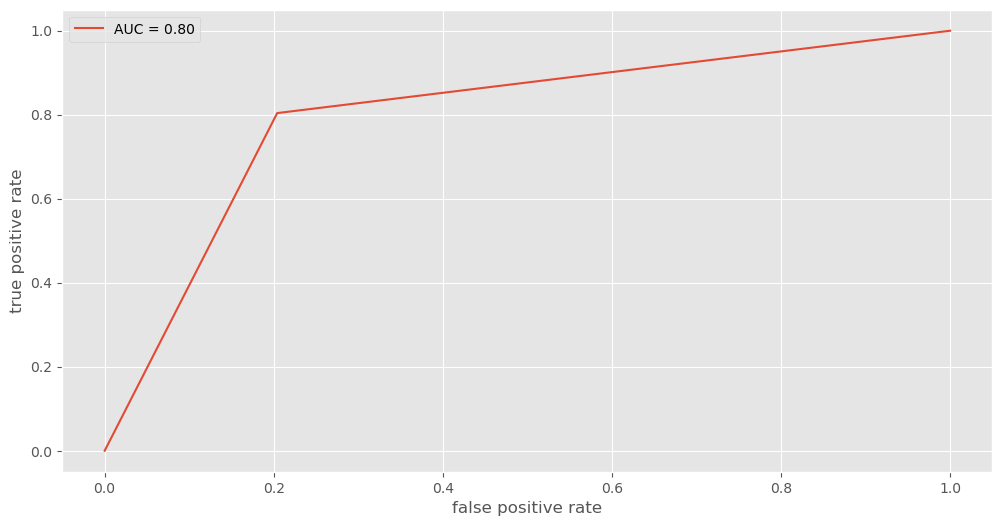

In [81]:
y_predKNN = modelKNN.predict_proba(Xtest)[:,1]

from sklearn.metrics import roc_curve , auc
fpr , tpr , threshold = roc_curve(ytest , ypredKNN)

roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,label="AUC = {:.2f}".format(roc_auc))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.legend(loc="best")

plt.show()

# SVM Linear Kernel Classifier

In [82]:
from sklearn.svm import SVC

modelSVC = SVC(kernel="linear",C=0.5,random_state=0)
modelSVC.fit(Xtrain,ytrain)
ypredSVC = modelSVC.predict(Xtest)

mseSVC = mean_squared_error(ytest,ypredSVC)
maeSVC = mean_absolute_error(ytest,ypredSVC)
mapeSVC = mean_absolute_percentage_error(ytest,ypredSVC)
rmseSVC = np.sqrt(mseSVC)
scoreSVC = r2_score(ytest,ypredSVC)
accuracySVC = accuracy_score(ytest,ypredSVC)
recallSVC = recall_score(ytest,ypredSVC)
ave_lossSVC , ave_biasSVC , ave_varSVC = bias_variance_decomp(modelSVC , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of SVM Classifier      : {mseSVC:.2f}")
print(f"MAE of SVM Classifier      : {maeSVC:.2f}")
print(f"MAPE of SVM Classifier     : {mapeSVC:.2f}")
print(f"RMSE of SVM Classifier     : {rmseSVC:.2f}")
print(f"SCORE of SVM Classifier    : {scoreSVC*100:.2f} %")
print(f"Accuracy of SVM Classifier : {accuracySVC*100:.2f} %")
print(f"Recall of SVM Classifier   : {recallSVC*100:.2f} %")
print(f"Loss of SVM Classifier     : {ave_lossSVC:.2f} ")
print(f"BIAS of SVM Classifier     : {ave_biasSVC:.2f} ")
print(f"VARIANCE of SVM Classifier : {ave_varSVC:.2f} ")



MSE of SVM Classifier      : 0.20
MAE of SVM Classifier      : 0.20
MAPE of SVM Classifier     : 450359962737049.62
RMSE of SVM Classifier     : 0.45
SCORE of SVM Classifier    : 19.97 %
Accuracy of SVM Classifier : 80.00 %
Recall of SVM Classifier   : 80.39 %
Loss of SVM Classifier     : 0.20 
BIAS of SVM Classifier     : 0.19 
VARIANCE of SVM Classifier : 0.01 


In [ ]:
confusion_matrixSVC = confusion_matrix(ytest,ypredSVC)
print("Confusion Matrix Of SVC Classifier \n", confusion_matrixSVC)

reportSVC = classification_report(ytest,ypredSVC)
print(reportSVC)

Confusion Matrix Of SVC Classifier 
 [[78 20]
 [20 82]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        98
           1       0.80      0.80      0.80       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



# SVM Poly Kernel Classifier

In [83]:
modelSVCP = SVC(kernel="poly",C=0.7,random_state=0)
modelSVCP.fit(Xtrain,ytrain)
ypredSVCP = modelSVCP.predict(Xtest)

mseSVCP = mean_squared_error(ytest,ypredSVCP)
maeSVCP = mean_absolute_error(ytest,ypredSVCP)
mapeSVCP = mean_absolute_percentage_error(ytest,ypredSVCP)
rmseSVCP = np.sqrt(mseSVCP)
scoreSVCP = r2_score(ytest,ypredSVCP)
accuracySVCP = accuracy_score(ytest,ypredSVCP)
recallSVCP = recall_score(ytest,ypredSVCP)
ave_lossSVCP , ave_biasSVCP , ave_varSVCP = bias_variance_decomp(modelSVCP , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of SVM Poly Classifier      : {mseSVCP:.2f}")
print(f"MAE of SVM Poly Classifier      : {maeSVCP:.2f}")
print(f"MAPE of SVM Poly Classifier     : {mapeSVCP:.2f}")
print(f"RMSE of SVM Poly Classifier     : {rmseSVCP:.2f}")
print(f"SCORE of SVM Poly Classifier    : {scoreSVCP*100:.2f} %")
print(f"Accuracy of SVM Poly Classifier : {accuracySVCP*100:.2f} %")
print(f"Recall of SVM Poly Classifier   : {recallSVCP*100:.2f} %")
print(f"Loss of SVM Poly Classifier     : {ave_lossSVCP:.2f} ")
print(f"BIAS of SVM Poly Classifier     : {ave_biasSVCP:.2f} ")
print(f"VARIANCE of SVM Poly Classifier : {ave_varSVCP:.2f} ")

MSE of SVM Poly Classifier      : 0.21
MAE of SVM Poly Classifier      : 0.21
MAPE of SVM Poly Classifier     : 517913957147607.06
RMSE of SVM Poly Classifier     : 0.46
SCORE of SVM Poly Classifier    : 13.97 %
Accuracy of SVM Poly Classifier : 78.50 %
Recall of SVM Poly Classifier   : 80.39 %
Loss of SVM Poly Classifier     : 0.21 
BIAS of SVM Poly Classifier     : 0.20 
VARIANCE of SVM Poly Classifier : 0.01 


In [84]:
confusion_matrixSVCP = confusion_matrix(ytest,ypredSVCP)
print("Confusion Matrix Of SVCP Classifier \n", confusion_matrixSVCP)

reportSVCP = classification_report(ytest,ypredSVCP)
print(reportSVCP)

Confusion Matrix Of SVCP Classifier 
 [[75 23]
 [20 82]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        98
           1       0.78      0.80      0.79       102

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



# Boosting

In [85]:
from sklearn.ensemble import AdaBoostClassifier

modelADA = AdaBoostClassifier(n_estimators=30,learning_rate=0.7,random_state=0)
modelADA.fit(Xtrain , ytrain)
ypredADA = modelADA.predict(Xtest)

mseADA = mean_squared_error(ytest,ypredADA)
maeADA = mean_absolute_error(ytest,ypredADA)
mapeADA = mean_absolute_percentage_error(ytest,ypredADA)
rmseADA = np.sqrt(mseADA)
scoreADA = r2_score(ytest,ypredADA)
accuracyADA = accuracy_score(ytest,ypredADA)
recallADA = recall_score(ytest,ypredADA)
ave_lossADA , ave_biasADA , ave_varADA = bias_variance_decomp(modelADA , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of AdaBoost Classifier      : {mseADA:.2f}")
print(f"MAE of AdaBoost Classifier      : {maeADA:.2f}")
print(f"MAPE of AdaBoost Classifier     : {mapeADA:.2f}")
print(f"RMSE of AdaBoost Classifier     : {rmseADA:.2f}")
print(f"SCORE of AdaBoost Classifier    : {scoreADA*100:.2f} %")
print(f"Accuracy of AdaBoost Classifier : {accuracyADA*100:.2f} %")
print(f"Recall of AdaBoost Classifier   : {recallADA*100:.2f} %")
print(f"Loss of AdaBoost Classifier     : {ave_lossADA:.2f} ")
print(f"BIAS of AdaBoost Classifier     : {ave_biasADA:.2f} ")
print(f"VARIANCE of AdaBoost Classifier : {ave_varADA:.2f} ")


MSE of AdaBoost Classifier      : 0.24
MAE of AdaBoost Classifier      : 0.24
MAPE of AdaBoost Classifier     : 517913957147607.12
RMSE of AdaBoost Classifier     : 0.49
SCORE of AdaBoost Classifier    : 3.96 %
Accuracy of AdaBoost Classifier : 76.00 %
Recall of AdaBoost Classifier   : 75.49 %
Loss of AdaBoost Classifier     : 0.22 
BIAS of AdaBoost Classifier     : 0.17 
VARIANCE of AdaBoost Classifier : 0.05 


In [86]:
confusion_matricADA = confusion_matrix(ytest,ypredADA)
reportADA = classification_report(ytest,ypredADA)
print(confusion_matricADA)
print(reportADA)

[[75 23]
 [25 77]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        98
           1       0.77      0.75      0.76       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



# Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(Xtrain,ytrain)
ypredNB = modelNB.predict(Xtest)

mseNB = mean_squared_error(ytest,ypredNB)
maeNB = mean_absolute_error(ytest,ypredNB)
mapeNB = mean_absolute_percentage_error(ytest,ypredNB)
rmseNB = np.sqrt(mseNB)
scoreNB = r2_score(ytest,ypredNB)
accuracyNB = accuracy_score(ytest,ypredNB)
recallNB = recall_score(ytest,ypredNB)
ave_lossNB , ave_biasNB , ave_varNB = bias_variance_decomp(modelNB , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 


print(f"MSE of Naive Bayes Classifier      : {mseNB:.2f}")
print(f"MAE of Naive Bayes Classifier      : {maeNB:.2f}")
print(f"MAPE of Naive Bayes Classifier     : {mapeNB:.2f}")
print(f"RMSE of Naive Bayes Classifier     : {rmseNB:.2f}")
print(f"SCORE of Naive Bayes Classifier    : {scoreNB*100:.2f} %")
print(f"Accuracy of Naive Bayes Classifier : {accuracyNB*100:.2f} %")
print(f"Recall of Naive Bayes Classifier   : {recallNB*100:.2f} %")
print(f"Loss of Naive Bayes Classifier     : {ave_lossNB:.2f} ")
print(f"BIAS of Naive Bayes Classifier     : {ave_biasNB:.2f} ")
print(f"VARIANCE of Naive Bayes Classifier : {ave_varNB:.2f} ")

MSE of Naive Bayes Classifier      : 0.23
MAE of Naive Bayes Classifier      : 0.23
MAPE of Naive Bayes Classifier     : 315251973915934.88
RMSE of Naive Bayes Classifier     : 0.48
SCORE of Naive Bayes Classifier    : 5.96 %
Accuracy of Naive Bayes Classifier : 76.50 %
Recall of Naive Bayes Classifier   : 67.65 %
Loss of Naive Bayes Classifier     : 0.28 
BIAS of Naive Bayes Classifier     : 0.15 
VARIANCE of Naive Bayes Classifier : 0.13 


In [88]:
confusion_matrixNB = confusion_matrix(ytest,ypredNB)
reportNB = classification_report(ytest,ypredNB)
print(confusion_matricADA)
print(reportNB)

[[75 23]
 [25 77]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        98
           1       0.83      0.68      0.75       102

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200



# XGBoost Classifier

In [89]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(objective= "binary:logistic",random_state=42)
modelXGB.fit(Xtrain,ytrain)
ypredXGB = modelXGB.predict(Xtest)

mseXGB = mean_squared_error(ytest,ypredXGB)
maeXGB = mean_absolute_error(ytest,ypredXGB)
mapeXGB = mean_absolute_percentage_error(ytest,ypredXGB)
rmseXGB = np.sqrt(mseXGB)
scoreXGB = r2_score(ytest,ypredXGB)
accuracyXGB = accuracy_score(ytest,ypredXGB)
recallXGB = recall_score(ytest,ypredXGB)
ave_lossXGB , ave_biasXGB , ave_varXGB = bias_variance_decomp(modelXGB , Xtrain,ytrain,Xtest,ytest, loss = "mse" ,num_rounds=100,random_seed=123) 

print(f"MSE of XGBoost Classifier      : {mseXGB:.2f}")
print(f"MAE of XGBoost Classifier      : {maeXGB:.2f}")
print(f"MAPE of XGBoost Classifier     : {mapeXGB:.2f}")
print(f"RMSE of XGBoost Classifier     : {rmseXGB:.2f}")
print(f"SCORE of XGBoost Classifier    : {scoreXGB*100:.2f} %")
print(f"Accuracy of XGBoost Classifier : {accuracyXGB*100:.2f} %")
print(f"Recall of XGBoost Classifier   : {recallXGB*100:.2f} %")
print(f"Loss of XGBoost Classifier     : {ave_lossXGB:.2f} ")
print(f"BIAS of XGBoost Classifier     : {ave_biasXGB:.2f} ")
print(f"VARIANCE of XGBoost Classifier : {ave_varXGB:.2f} ")

MSE of XGBoost Classifier      : 0.21
MAE of XGBoost Classifier      : 0.21
MAPE of XGBoost Classifier     : 427841964600197.19
RMSE of XGBoost Classifier     : 0.46
SCORE of XGBoost Classifier    : 15.97 %
Accuracy of XGBoost Classifier : 79.00 %
Recall of XGBoost Classifier   : 77.45 %
Loss of XGBoost Classifier     : 0.21 
BIAS of XGBoost Classifier     : 0.15 
VARIANCE of XGBoost Classifier : 0.06 


In [90]:
confusion_matricXGB = confusion_matrix(ytest,ypredXGB)
reportXGB = classification_report(ytest,ypredXGB)
print(confusion_matricXGB)
print(reportXGB)

[[79 19]
 [23 79]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        98
           1       0.81      0.77      0.79       102

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# So I would Choose KNN and SVM Linear as The Best Classifiers To Predict the Gender Of the Student Based On His Results and Some Other Features